In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif


In [3]:
df = pd.read_csv("adult_with_headers.csv")


In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


***EDA***

In [5]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss

This gives us an idea about dataset size, data types, missing values, 
and summary statistics of numerical features.


***Handel missing val***

In [6]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again
df.isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_7036\2654246880.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing values (represented by '?') are replaced with NaN and then filled using mode. 
This ensures no missing values remain in the dataset.

***visualize numeric col***

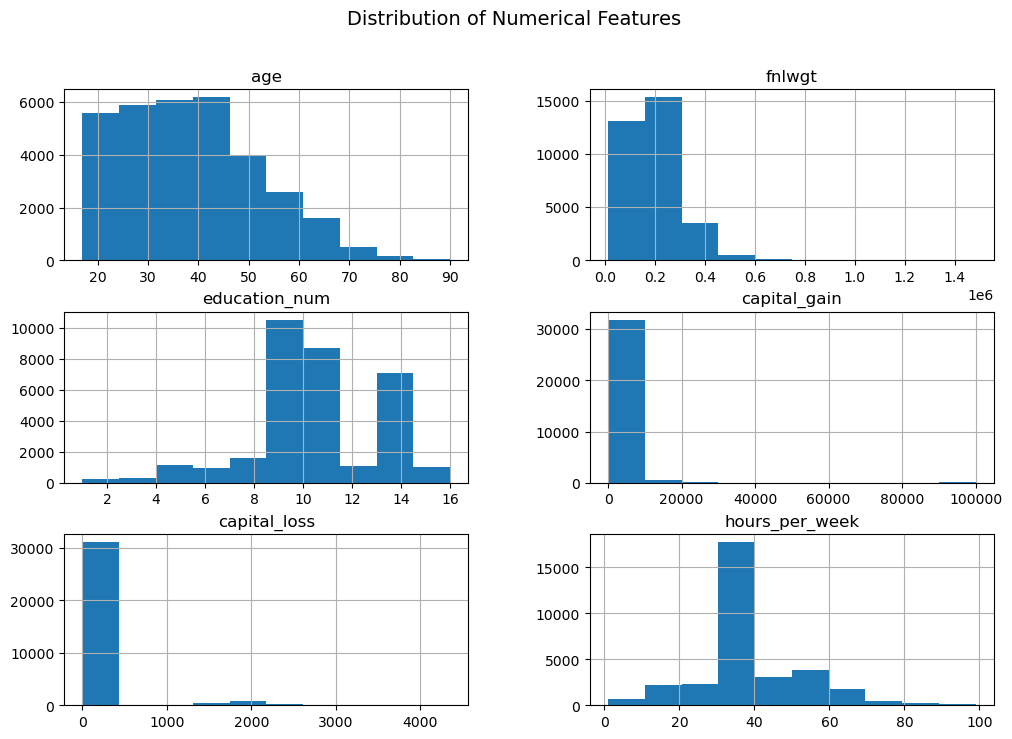

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(figsize=(12,8))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

 plotted histograms for all numeric features to understand their distributions 
 and check for skewness or outliers.

***Scale numeric feature***

In [8]:
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df_std = df.copy()
df_minmax = df.copy()

df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])


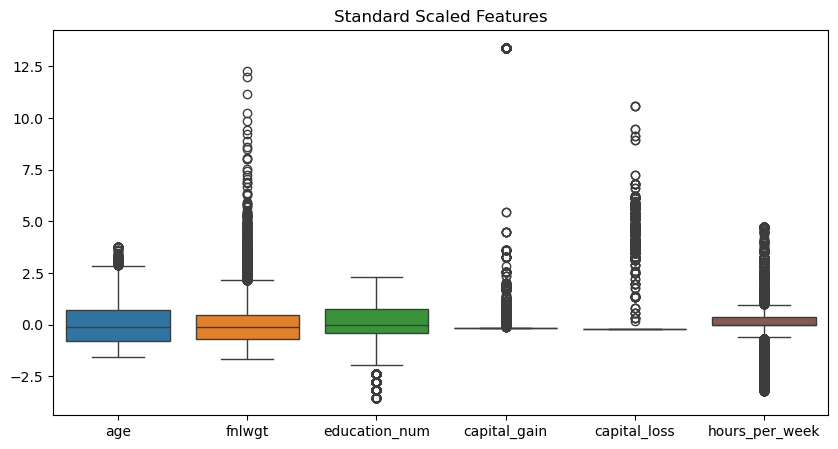

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_std[num_cols])
plt.title("Standard Scaled Features")
plt.show()

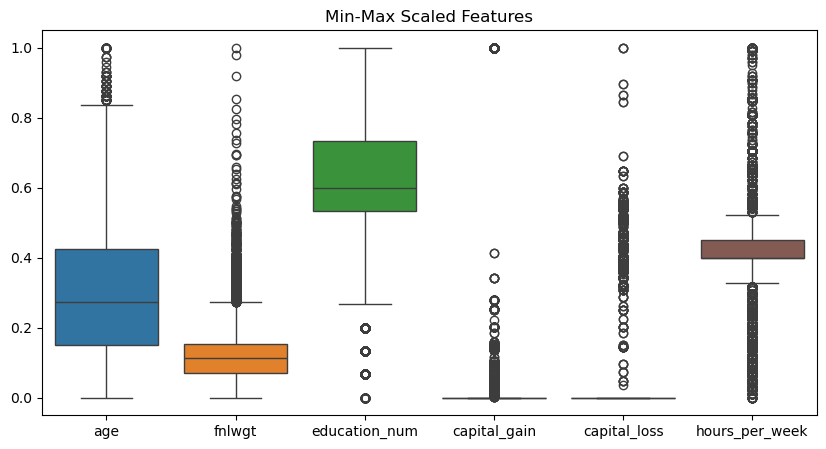

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_minmax[num_cols])
plt.title("Min-Max Scaled Features")
plt.show()

Standard Scaling standardizes data (mean=0, std=1), good for Normal data.
Min-Max Scaling rescales data between 0–1, useful for models like Neural Networks.

***Encoding Categorical Features***

In [11]:
df_enc = df.copy()
cat_cols = df_enc.select_dtypes(include='object').columns

for col in cat_cols:
    if df_enc[col].nunique() <= 5:
        df_enc = pd.get_dummies(df_enc, columns=[col], drop_first=True)
    else:
        le = LabelEncoder()
        df_enc[col] = le.fit_transform(df_enc[col])

df_enc.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False


One-Hot Encoding used for small categories (<5 unique values),
Label Encoding used for large ones. 
One-Hot avoids order assumptions; Label Encoding is simpler but may mislead some models.

***Feature Engineering***

In [15]:

# Standardize column names (replace '-' with '_')
df_enc.columns = df_enc.columns.str.replace('-', '_')

# New feature 1: Net capital gain/loss
if 'capital_gain' in df_enc.columns and 'capital_loss' in df_enc.columns:
    df_enc['net_capital'] = df_enc['capital_gain'] - df_enc['capital_loss']
else:
    print("⚠️ Columns 'capital_gain' or 'capital_loss' not found.")

# New feature 2: Work hour category
if 'hours_per_week' in df_enc.columns:
    df_enc['work_hrs_category'] = pd.cut(df_enc['hours_per_week'], 
                                         bins=[0, 35, 40, 60, 100], 
                                         labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])
else:
    print("⚠️ Column 'hours_per_week' not found.")

# Log transform of skewed feature
if 'fnlwgt' in df_enc.columns:
    df_enc['log_fnlwgt'] = np.log1p(df_enc['fnlwgt'])
else:
    print("⚠️ Column 'fnlwgt' not found.")




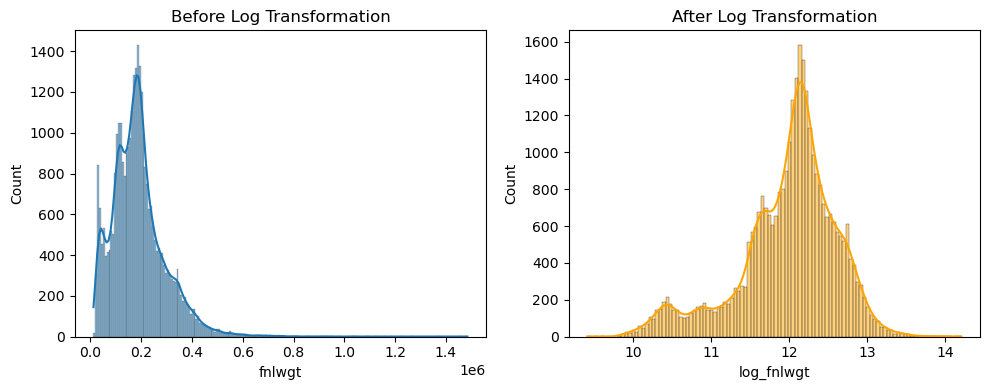

In [16]:
# Compare before and after log transformation
plt.figure(figsize=(10,4))
if 'fnlwgt' in df_enc.columns:
    plt.subplot(1,2,1)
    sns.histplot(df_enc['fnlwgt'], kde=True)
    plt.title("Before Log Transformation")

if 'log_fnlwgt' in df_enc.columns:
    plt.subplot(1,2,2)
    sns.histplot(df_enc['log_fnlwgt'], kde=True, color='orange')
    plt.title("After Log Transformation")

plt.tight_layout()
plt.show()

We first fix column names to use underscores (_) for easy access.
Then we create two new features: net capital gain/loss and work hours category.
Finally, we apply log transformation to reduce skewness in 'fnlwgt'.

***Outlier Detection using Isolation Forest***

In [17]:
iso = IsolationForest(contamination=0.02, random_state=42)
outlier_flag = iso.fit_predict(df_enc[num_cols])
df_clean = df_enc[outlier_flag == 1]

print("Before:", df_enc.shape)
print("After removing outliers:", df_clean.shape)

Before: (32561, 21)
After removing outliers: (31909, 21)


Isolation Forest detects unusual data points (outliers) that may mislead models. 
Removing them improves training accuracy and generalization.

***Feature Selection using Mutual Information***

In [22]:

# Clean column names again to ensure consistency
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace('-', '_')

# Try to automatically detect target column
possible_targets = [c for c in df_clean.columns if 'income' in c or 'class' in c or 'target' in c]
if possible_targets:
    target_col = possible_targets[0]
    print(f"✅ Target column detected as: '{target_col}'")
else:
    raise ValueError("❌ Target column (income/class/target) not found. Please check dataset columns.")


✅ Target column detected as: 'workclass'


In [23]:
# Separate features and target
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# Ensure target is encoded numerically if categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

In [24]:
# Compute Mutual Information (for numeric columns only)
num_features = X.select_dtypes(include=[np.number])
mi_scores = mutual_info_classif(num_features, y, random_state=42)

# Create a dataframe of MI scores
mi_df = pd.DataFrame({
    'Feature': num_features.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)


C:\Users\hp\AppData\Local\Temp\ipykernel_7036\4173050020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='Mutual Information', y='Feature', palette='viridis')


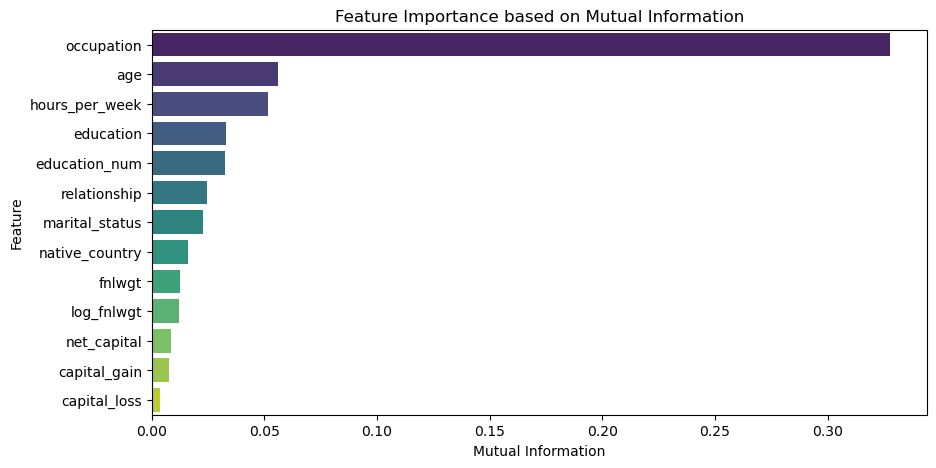

In [25]:

# Plot Mutual Information
plt.figure(figsize=(10,5))
sns.barplot(data=mi_df, x='Mutual Information', y='Feature', palette='viridis')
plt.title("Feature Importance based on Mutual Information")
plt.show()

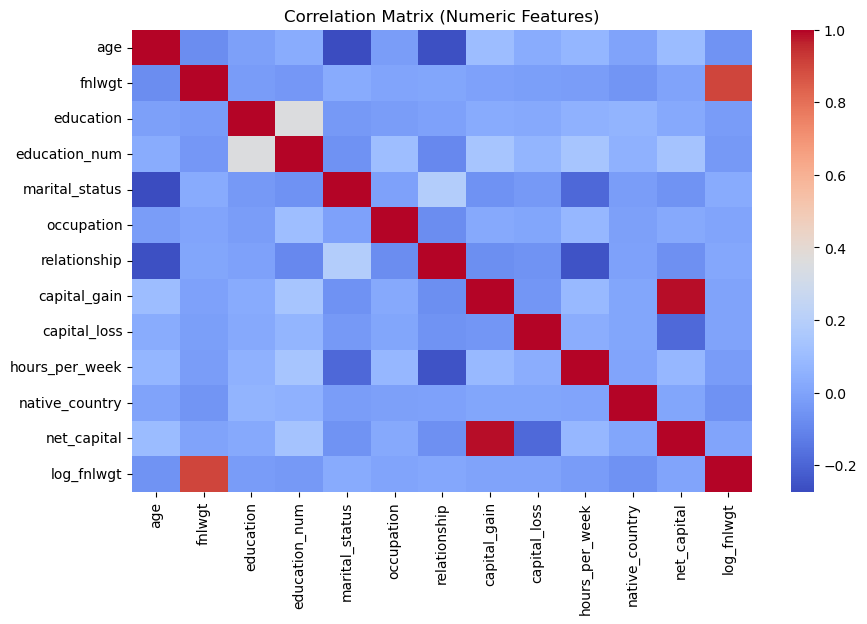

In [26]:
# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(num_features.corr(), cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


We first detect the target column automatically (handles cases like ' income' or 'class').
Then we compute Mutual Information to measure non-linear feature importance.
Correlation heatmap shows linear relationships for comparison.

***save clean dataset***

In [27]:
df_clean.to_csv("adult_cleaned.csv", index=False)
print("Clean dataset saved successfully!")


Clean dataset saved successfully!
